In [ ]:
#IMPORTING DATA
import csv
import numpy as np


#read the .csv file and create a list
with open('Figure 6C.csv', newline='') as f:
    reader = csv.reader(f)
    data=[]
    for row in reader:
        data.append(row)
experimental_data=data[2:]

#Extract genotypes     
genotype=data[1] 
num_genotype=int((len(genotype)/2))
genotype=genotype[:num_genotype]

#Extract nutrient conditions
first_row=data[0] #here we have the nutrient condition but we need to clean it since there are some emtpy cells

nutrient=[]
for row in first_row:
   
    if len(row)>0:
        nutrient.append(row)

#extract conditions
conditions=[]
for row in nutrient:
    for x in genotype:
        c='_'
        condition=row + c + x
        conditions.append(condition)
    
#create a dictionary to fill in the experimental data
experimental_conditions=dict.fromkeys(conditions)

#transpose the data to convert rows to collumns
experimental_data=np.transpose(experimental_data)

#fill in the dictionary
counter=0
for key in conditions:
    experimental_conditions[key]=experimental_data[counter]
    counter=counter+1
#print conditions and data to check if they are created properly.
print(conditions)
print(nutrient)
print(genotype)


['SAA_MTD-Gal4>GFP RNAi  SAA', 'SAA_MTD-Gal4>Rpi RNAi  SAA', 'AA_MTD-Gal4>GFP RNAi  SAA', 'AA_MTD-Gal4>Rpi RNAi  SAA']
['SAA', 'AA']
['MTD-Gal4>GFP RNAi  SAA', 'MTD-Gal4>Rpi RNAi  SAA']


In [ ]:
#ORDERING CONDITIONS
print('Number of genotypes to compare is '+ str(len(genotype)) + '.')
print()
queried_conditions=[]
if len(genotype)==4:
    cond_1= experimental_conditions[conditions[4]]
    cond_2= experimental_conditions[conditions[0]]
    queried_conditions.append([conditions[4],conditions[0]])
    cond_3= experimental_conditions[conditions[5]]
    cond_4= experimental_conditions[conditions[1]]  
    queried_conditions.append([conditions[5],conditions[1]])
    cond_5= experimental_conditions[conditions[6]]
    cond_6= experimental_conditions[conditions[2]]  
    queried_conditions.append([conditions[6],conditions[2]])
    cond_7= experimental_conditions[conditions[7]]
    cond_8= experimental_conditions[conditions[3]]
    queried_conditions.append([conditions[7],conditions[3]])
elif len(genotype)==3:
    cond_1= experimental_conditions[conditions[3]]
    cond_2= experimental_conditions[conditions[0]]
    queried_conditions.append([conditions[3],conditions[0]])
    cond_3= experimental_conditions[conditions[4]]
    cond_4= experimental_conditions[conditions[1]]  
    queried_conditions.append([conditions[4],conditions[1]])
    cond_5= experimental_conditions[conditions[5]]
    cond_6= experimental_conditions[conditions[2]]  
    queried_conditions.append([conditions[5],conditions[2]])
    

elif len(genotype)==2:
    cond_1= experimental_conditions[conditions[2]]
    cond_2= experimental_conditions[conditions[0]]
    queried_conditions.append([conditions[2],conditions[0]])
    cond_3= experimental_conditions[conditions[3]]
    cond_4= experimental_conditions[conditions[1]]  
    queried_conditions.append([conditions[3],conditions[1]])

#print conditions that are going to be used to calculate delta. 
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
print('**!!!Attention. Second conditions will be substracted from the first condition to calculate Delta. Check if they are correct!!!**')
print('**Queried conditions are:**')
print(queried_conditions)


Number of genotypes to compare is 2.

**!!!Attention. Second conditions will be substracted from the first condition to calculate Delta. Check if they are correct!!!**
**Queried conditions are:**
[['AA_MTD-Gal4>GFP RNAi  SAA', 'SAA_MTD-Gal4>GFP RNAi  SAA'], ['AA_MTD-Gal4>Rpi RNAi  SAA', 'SAA_MTD-Gal4>Rpi RNAi  SAA']]


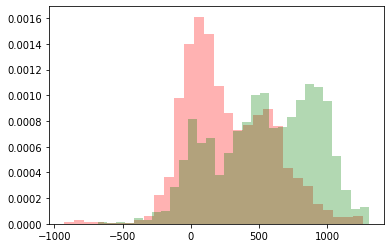

In [ ]:
#CALCULATION OF DELTAS

import matplotlib.pyplot as plt

#define some parameters to plot histograms
number_of_bins=30 
transparency=0.3 #transparency of the histrograms.0-1

if len(genotype)==4:
    all_possible_delta_values_1=[]
    for row_1 in cond_1:
        print(row_1)
        row_1=float(row_1) 
        for row_2 in cond_2:
            row_2=float(row_2)
            if row_1>0 and row_2>0:
                all_possible_delta_values_1.append(row_1-row_2)
            

    all_possible_delta_values_2=[]
    for row_3 in cond_3:
        row_3=float(row_3)
        for row_4 in cond_4:
            row_4=float(row_4)
            if row_3>0 and row_4>0:
                all_possible_delta_values_2.append(row_3-row_4)

            
            
            
    all_possible_delta_values_3=[]
    for row_5 in cond_5:
        row_5=float(row_5)
        for row_6 in cond_6:
            row_6=float(row_6)
            if row_5>0 and row_6>0:
                all_possible_delta_values_3.append(row_5-row_6)
                
    all_possible_delta_values_4=[]
    for row_7 in cond_7:
        row_7=float(row_7)
        for row_8 in cond_8:
            row_8=float(row_8)
            if row_7>0 and row_8>0:
                all_possible_delta_values_4.append(row_7-row_8)
    
    
#plot distributions                
    ax1=pyplot.hist(all_possible_delta_values_1, number_of_bins, density=True, facecolor='r', alpha=transparency, label=genotype[0])
    ax2=pyplot.hist(all_possible_delta_values_2, number_of_bins, density=True, facecolor='g', alpha=transparency, label=genotype[1])
    ax3=pyplot.hist(all_possible_delta_values_3, number_of_bins, density=True, facecolor='b', alpha=transparency, label=genotype[2])
    ax4=pyplot.hist(all_possible_delta_values_4, number_of_bins, density=True, facecolor='k', alpha=transparency, label=genotype[3])
    plt.legend(loc='upper left')
    plt.xlabel('delta # of sips')
    plt.ylabel('frequency')
    plt.show()

elif len(genotype)==3:
    all_possible_delta_values_1=[]
    for row_1 in cond_1:
        row_1=float(row_1)
        for row_2 in cond_2:
            row_2=float(row_2)
            if row_1>0 and row_2>0:
                all_possible_delta_values_1.append(row_1-row_2)
            

    all_possible_delta_values_2=[]
    for row_3 in cond_3:
        row_3=float(row_3)
        for row_4 in cond_4:
            row_4=float(row_4)
            if row_3>0 and row_4>0:
                all_possible_delta_values_2.append(row_3-row_4)

            
            
            
    all_possible_delta_values_3=[]
    for row_5 in cond_5:
        row_5=float(row_5)
        for row_6 in cond_6:
            row_6=float(row_6)
            if row_5>0 and row_6>0:
                all_possible_delta_values_3.append(row_5-row_6)
    
    #plot distributions                
    ax1=pyplot.hist(all_possible_delta_values_1, number_of_bins, density=True, facecolor='r', alpha=transparency, label=genotype[0])
    ax2=pyplot.hist(all_possible_delta_values_2, number_of_bins, density=True, facecolor='g', alpha=transparency, label=genotype[1])
    ax3=pyplot.hist(all_possible_delta_values_3, number_of_bins, density=True, facecolor='b', alpha=transparency, label=genotype[2])
    pyplot.legend(loc='upper left')
    plt.xlabel('delta # of sips')
    plt.ylabel('frequency')
    pyplot.show()

elif len(genotype)==2:
    all_possible_delta_values_1=[]
    for row_1 in cond_1:
        row_1=float(row_1)
        for row_2 in cond_2:
            row_2=float(row_2)
            if row_1>0 and row_2>0:
                all_possible_delta_values_1.append(row_1-row_2)
            

    all_possible_delta_values_2=[]
    for row_3 in cond_3:
        row_3=float(row_3)
        for row_4 in cond_4:
            row_4=float(row_4)
            if row_3>0 and row_4>0:
                all_possible_delta_values_2.append(row_3-row_4)
    
    #plot distributions                
    ax1=pyplot.hist(all_possible_delta_values_1, number_of_bins, density=True, facecolor='r', alpha=transparency, label=genotype[0])
    ax2=pyplot.hist(all_possible_delta_values_2, number_of_bins, density=True, facecolor='g', alpha=transparency, label=genotype[1])
    plt.xlabel('delta # of sips')
    plt.ylabel('frequency')
    pyplot.show()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


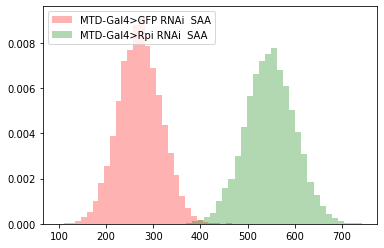

Confidence level is 0.95
Confidence interval for MTD-Gal4>GFP RNAi  SAAis (182.54589089035284, 360.2800691096472)
Mean for MTD-Gal4>GFP RNAi  SAAis 271.41298

Confidence interval for MTD-Gal4>Rpi RNAi  SAAis (445.7859617949031, 649.898966205097)
Mean forMTD-Gal4>Rpi RNAi  SAAis 547.8424640000001

The statistical test used to compare bootstrapped samples is Wilcoxon Ranksum
Mean bootstrapped p-value for MTD-Gal4>GFP RNAi  SAA and MTD-Gal4>Rpi RNAi  SAA is 0.0004259067703004511


In [ ]:
#BOOTSTRAPPING
from sklearn.utils import resample
import statistics
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Define some parameters for bootstrapping
iterations=10000 #total number of iterations ideally >1000
sample_length=50 #define the number of picks for each bootstrap sample
comparisons=1 #enter the total number of comparisons
confidence = 1-(0.05/comparisons) #confidence level for building confidence intervals
hypothesis_testing='Wilcoxon Ranksum' #the test type for bootstrapped sample p values: 'Wilcoxon Ranksum' or 'ttest'
#Define some parameter for histrograms
number_of_bins=30
transparencey=0.3
#Bootstrap sampling starts
if len(queried_conditions)==4:
    
    bootstrap_mean_dist_1=[]
    bootstrap_mean_dist_2=[]
    bootstrap_mean_dist_3=[]
    bootstrap_mean_dist_4=[]
    bootstrap_p_dist_1_2=[]
    bootstrap_p_dist_1_3=[]
    bootstrap_p_dist_1_4=[]
    bootstrap_p_dist_2_3=[]
    bootstrap_p_dist_2_4=[]
    bootstrap_p_dist_3_4=[]
    
    for i in range(iterations):
        genotype_1 = resample(all_possible_delta_values_1,n_samples=sample_length)
        genotype_2 = resample(all_possible_delta_values_2,n_samples=sample_length)
        genotype_3 = resample(all_possible_delta_values_3,n_samples=sample_length)
        genotype_4 = resample(all_possible_delta_values_4,n_samples=sample_length)
        if hypothesis_testing=='Wilcoxon Ranksum':
            t1, pval_1_2 = stats.wilcoxon(genotype_1,genotype_2)
            t2, pval_1_3 = stats.wilcoxon(genotype_1,genotype_3)
            t3, pval_1_4 = stats.wilcoxon(genotype_1,genotype_4)
            t4, pval_2_3 = stats.wilcoxon(genotype_2,genotype_3)
            t5, pval_2_4 = stats.wilcoxon(genotype_2,genotype_4)
            t5, pval_3_4 = stats.wilcoxon(genotype_3,genotype_4)
     
        elif hypothesis_testing=='ttest':
            t1, pval_1_2 = stats.ttest_ind(genotype_1,genotype_2)
            t2, pval_1_3 = stats.ttest_ind(genotype_1,genotype_3)
            t3, pval_1_4 = stats.ttest_ind(genotype_1,genotype_4)
            t4, pval_2_3 = stats.ttest_ind(genotype_2,genotype_3)
            t5, pval_2_4 = stats.ttest_ind(genotype_2,genotype_4)
            t5, pval_3_4 = stats.ttest_ind(genotype_3,genotype_4)
        
    # For each genotype, create a bootstrap distribution of means   
        bootstrap_mean_dist_1.append(statistics.mean(genotype_1))
        bootstrap_mean_dist_2.append(statistics.mean(genotype_2))
        bootstrap_mean_dist_3.append(statistics.mean(genotype_3))
        bootstrap_mean_dist_4.append(statistics.mean(genotype_4))
    # For each genotype pair, create a bootstrap distribution of p-values    
        bootstrap_p_dist_1_2.append(pval_1_2)
        bootstrap_p_dist_1_3.append(pval_1_3)
        bootstrap_p_dist_1_4.append(pval_1_4)
        bootstrap_p_dist_2_3.append(pval_2_3)
        bootstrap_p_dist_2_4.append(pval_2_4)
        bootstrap_p_dist_3_4.append(pval_3_4)

    
    # Calculate median bootstrapped p-values
    median_bootstrapped_p_val_1_2 = statistics.median(bootstrap_p_dist_1_2)
    median_bootstrapped_p_val_1_3 = statistics.median(bootstrap_p_dist_1_3)
    median_bootstrapped_p_val_1_4 = statistics.median(bootstrap_p_dist_1_4)
    median_bootstrapped_p_val_2_3 = statistics.median(bootstrap_p_dist_2_3)
    median_bootstrapped_p_val_2_4 = statistics.median(bootstrap_p_dist_2_4)
    median_bootstrapped_p_val_3_4 = statistics.median(bootstrap_p_dist_3_4)

    # Plot histograms
    ax_1=plt.hist(bootstrap_mean_dist_1, number_of_bins, density=True, facecolor='r', alpha=transparency,label=genotype[0])
    ax_2=plt.hist(bootstrap_mean_dist_2, number_of_bins, density=True, facecolor='g', alpha=transparency,label=genotype[1])
    ax_3=plt.hist(bootstrap_mean_dist_3, number_of_bins, density=True, facecolor='b', alpha=transparency,label=genotype[2])
    ax_4=plt.hist(bootstrap_mean_dist_4, number_of_bins, density=True, facecolor='k', alpha=transparency,label=genotype[3])
    pyplot.legend(loc='upper left')
    plt.xlabel('delta # of sips')
    plt.ylabel('frequency')
    pyplot.show()
    
    # Calculate confidence intervals
    data_1= bootstrap_mean_dist_1
    mean_1, sigma_1 = np.mean(data_1), np.std(data_1)
    
    data_2= bootstrap_mean_dist_2
    mean_2, sigma_2 = np.mean(data_2), np.std(data_2)
    
    data_3= bootstrap_mean_dist_3
    mean_3, sigma_3 = np.mean(data_3), np.std(data_3)
    
    data_4= bootstrap_mean_dist_4
    mean_4, sigma_4 = np.mean(data_4), np.std(data_4)
    
    
    conf_int_1 = stats.norm.interval(confidence, loc=mean_1, scale=sigma_1)
    print('Confidence level is ' + str(confidence))
    print('Confidence interval for '+ genotype[0] + 'is ' + str(conf_int_1))
    print('Mean for '+ genotype[0] + 'is ' + str(mean_1))
    print()
    
    conf_int_2 = stats.norm.interval(confidence, loc=mean_2, scale=sigma_2)
    
    print('Confidence interval for '+ genotype[1] + 'is ' + str(conf_int_2))
    print('Mean for'+ genotype[1] + 'is ' + str(mean_2))
    print()
    
    conf_int_3 = stats.norm.interval(confidence, loc=mean_3, scale=sigma_3)
    
    print('Confidence interval for '+ genotype[2] + 'is ' + str(conf_int_3))
    print('Mean for'+ genotype[2] + 'is ' + str(mean_3))
    print()
    
    conf_int_4 = stats.norm.interval(confidence, loc=mean_4, scale=sigma_4)
    
    print('Confidence interval for '+ genotype[3] + 'is ' + str(conf_int_4))
    print('Mean for'+ genotype[3] + 'is ' + str(mean_4))
    print()
    
    print('The statistical test used to compare bootstrapped samples is ' + hypothesis_testing)
    print('Mean bootstrapped p-value for ' + genotype[0] + ' and '+ genotype[1] + ' is ' + str(median_bootstrapped_p_val_1_2))
    print('Mean bootstrapped p-value for ' + genotype[0] + ' and '+ genotype[2] + ' is ' + str(median_bootstrapped_p_val_1_3))
    print('Mean bootstrapped p-value for ' + genotype[0] + ' and '+ genotype[3] + ' is ' + str(median_bootstrapped_p_val_1_4))
    print('Mean bootstrapped p-value for ' + genotype[1] + ' and '+ genotype[2] + ' is ' + str(median_bootstrapped_p_val_2_3))
    print('Mean bootstrapped p-value for ' + genotype[1] + ' and '+ genotype[3] + ' is ' + str(median_bootstrapped_p_val_2_4))
    print('Mean bootstrapped p-value for ' + genotype[2] + ' and '+ genotype[3] + ' is ' + str(median_bootstrapped_p_val_3_4))
    
    
    ##########################################################################################################
if len(queried_conditions)==3:
    
    bootstrap_mean_dist_1=[]
    bootstrap_mean_dist_2=[]
    bootstrap_mean_dist_3=[]
    bootstrap_p_dist_1_2=[]
    bootstrap_p_dist_1_3=[]
    bootstrap_p_dist_2_3=[]
    
    for i in range(iterations):
        genotype_1 = resample(all_possible_delta_values_1,n_samples=sample_length)
        genotype_2 = resample(all_possible_delta_values_2,n_samples=sample_length)
        genotype_3 = resample(all_possible_delta_values_3,n_samples=sample_length)
        if hypothesis_testing=='Wilcoxon Ranksum':
            t1, pval_1_2 = stats.wilcoxon(genotype_1,genotype_2)
            t2, pval_1_3 = stats.wilcoxon(genotype_1,genotype_3)
            t3, pval_2_3 = stats.wilcoxon(genotype_2,genotype_3)
            
     
        elif hypothesis_testing=='ttest':
            t1, pval_1_2 = stats.ttest_ind(genotype_1,genotype_2)
            t2, pval_1_3 = stats.ttest_ind(genotype_1,genotype_3)
            t3, pval_2_3 = stats.ttest_ind(genotype_2,genotype_3)
               
    # For each genotype, create a bootstrap distribution of means   
        bootstrap_mean_dist_1.append(statistics.mean(genotype_1))
        bootstrap_mean_dist_2.append(statistics.mean(genotype_2))
        bootstrap_mean_dist_3.append(statistics.mean(genotype_3))
        
    # For each genotype pair, create a bootstrap distribution of p-values    
        bootstrap_p_dist_1_2.append(pval_1_2)
        bootstrap_p_dist_1_3.append(pval_1_3)
        bootstrap_p_dist_2_3.append(pval_2_3)

        
    # Calculate median bootstrapped p-values
    median_bootstrapped_p_val_1_2 = statistics.median(bootstrap_p_dist_1_2)
    median_bootstrapped_p_val_1_3 = statistics.median(bootstrap_p_dist_1_3)
    median_bootstrapped_p_val_2_3 = statistics.median(bootstrap_p_dist_2_3)

    # Plot histograms
    ax_1=plt.hist(bootstrap_mean_dist_1, number_of_bins, density=True, facecolor='r', alpha=transparency,label=genotype[0])
    ax_2=plt.hist(bootstrap_mean_dist_2, number_of_bins, density=True, facecolor='g', alpha=transparency,label=genotype[1])
    ax_3=plt.hist(bootstrap_mean_dist_3, number_of_bins, density=True, facecolor='b', alpha=transparency,label=genotype[2])
    pyplot.legend(loc='upper left')
    plt.xlabel('delta # of sips')
    plt.ylabel('frequency')
    pyplot.show()
    
    # Calculate confidence intervals
    data_1= bootstrap_mean_dist_1
    mean_1, sigma_1 = np.mean(data_1), np.std(data_1)
    
    data_2= bootstrap_mean_dist_2
    mean_2, sigma_2 = np.mean(data_2), np.std(data_2)
    
    data_3= bootstrap_mean_dist_3
    mean_3, sigma_3 = np.mean(data_3), np.std(data_3)
    
    
    conf_int_1 = stats.norm.interval(confidence, loc=mean_1, scale=sigma_1)
    print('Confidence level is ' + str(confidence))
    print('Confidence interval for '+ genotype[0] + 'is ' + str(conf_int_1))
    print('Mean for '+ genotype[0] + 'is ' + str(mean_1))
    print()
    
    conf_int_2 = stats.norm.interval(confidence, loc=mean_2, scale=sigma_2)
    
    print('Confidence interval for '+ genotype[1] + 'is ' + str(conf_int_2))
    print('Mean for'+ genotype[1] + 'is ' + str(mean_2))
    print()
    
    conf_int_3 = stats.norm.interval(confidence, loc=mean_3, scale=sigma_3)
    
    print('Confidence interval for '+ genotype[2] + 'is ' + str(conf_int_3))
    print('Mean for'+ genotype[2] + 'is ' + str(mean_3))
    print()
    
    print('The statistical test used to compare bootstrapped samples is ' + hypothesis_testing)
    print('Mean bootstrapped p-value for ' + genotype[0] + ' and '+ genotype[1] + ' is ' + str(median_bootstrapped_p_val_1_2))
    print('Mean bootstrapped p-value for ' + genotype[0] + ' and '+ genotype[2] + ' is ' + str(median_bootstrapped_p_val_1_3))
    print('Mean bootstrapped p-value for ' + genotype[1] + ' and '+ genotype[2] + ' is ' + str(median_bootstrapped_p_val_2_3))


if len(queried_conditions)==2:
    
    bootstrap_mean_dist_1=[]
    bootstrap_mean_dist_2=[]
    bootstrap_p_dist_1_2=[]
    
    for i in range(iterations):
        genotype_1 = resample(all_possible_delta_values_1,n_samples=sample_length)
        genotype_2 = resample(all_possible_delta_values_2,n_samples=sample_length)
        
        if hypothesis_testing=='Wilcoxon Ranksum':
            t1, pval_1_2 = stats.wilcoxon(genotype_1,genotype_2)
            
     
        elif hypothesis_testing=='ttest':
            t1, pval_1_2 = stats.ttest_ind(genotype_1,genotype_2)
           
               
    # For each genotype, create a bootstrap distribution of means   
        bootstrap_mean_dist_1.append(statistics.mean(genotype_1))
        bootstrap_mean_dist_2.append(statistics.mean(genotype_2))
       
    # For each genotype pair, create a bootstrap distribution of p-values    
        bootstrap_p_dist_1_2.append(pval_1_2)
       
        
    # Calculate median bootstrapped p-values
    median_bootstrapped_p_val_1_2 = statistics.median(bootstrap_p_dist_1_2)
    

    # Plot histograms
    ax_1=plt.hist(bootstrap_mean_dist_1, number_of_bins, density=True, facecolor='r', alpha=transparency,label=genotype[0])
    ax_2=plt.hist(bootstrap_mean_dist_2, number_of_bins, density=True, facecolor='g', alpha=transparency,label=genotype[1])
    plt.xlabel('Delta # of sips')
    plt.legend(loc='upper left')
    plt.xlabel('delta # of sips')
    plt.ylabel('frequency')
    plt.show()
    
    # Calculate confidence intervals
    data_1= bootstrap_mean_dist_1
    mean_1, sigma_1 = np.mean(data_1), np.std(data_1)
    
    data_2= bootstrap_mean_dist_2
    mean_2, sigma_2 = np.mean(data_2), np.std(data_2)
    
    
    
    conf_int_1 = stats.norm.interval(confidence, loc=mean_1, scale=sigma_1)
    print('Confidence level is ' + str(confidence))
    print('Confidence interval for '+ genotype[0] + 'is ' + str(conf_int_1))
    print('Mean for '+ genotype[0] + 'is ' + str(mean_1))
    print()
    
    conf_int_2 = stats.norm.interval(confidence, loc=mean_2, scale=sigma_2)
    
    print('Confidence interval for '+ genotype[1] + 'is ' + str(conf_int_2))
    print('Mean for'+ genotype[1] + 'is ' + str(mean_2))
    print()
    

    print('The statistical test used to compare bootstrapped samples is ' + hypothesis_testing)
    print('Mean bootstrapped p-value for ' + genotype[0] + ' and '+ genotype[1] + ' is ' + str(median_bootstrapped_p_val_1_2))
    